# Fake news detection using ML 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## Read datasets

In [2]:
fake = pd.read_csv("data/NewsFakeCOVID-19.csv")
true = pd.read_csv("data/NewsRealCOVID-19.csv")

In [3]:
fake.shape

(922, 15)

In [4]:
true.shape

(4529, 10)

## Data cleaning and preparation

In [5]:
# Add flag to track fake and real
fake['label'] = 'fake'
true['label'] = 'true'

In [6]:
fake.head()

,id,type,fact_check_url,archive,news_url,news_url2,news_url3,news_url4,news_url5,title,newstitle,content,abstract,publish_date,meta_keywords,label
0,0,post,https://factcheck.afp.com/false-advice-refusin...,https://perma.cc/J4N6-39D5,https://www.facebook.com/photo.php?fbid=551960...,NaN,NaN,NaN,NaN,Facebook posts shared in at least three countr...,NaN,NaN,NaN,NaN,NaN,fake
1,1,article,https://www.politifact.com/factchecks/2020/apr...,NaN,http://legis.wisconsin.gov/assembly/republican...,NaN,NaN,NaN,NaN,Wisconsin is Òclearly seeing a decline in COVI...,"""Wisconsin Legislature Takes Gov. Evers to Court""",speaker robin vos r rochester and senate major...,NaN,NaN,"""""",fake
2,2,post,https://factcheck.afp.com/posts-claim-children...,https://perma.cc/V4HX-M2XJ,https://www.facebook.com/iAmJessenia/photos/a....,NaN,NaN,NaN,NaN,Facebook posts claim a child who is infected w...,NaN,NaN,NaN,NaN,NaN,fake
3,3,post,https://checkyourfact.com/2020/04/20/fact-chec...,NaN,https://www.facebook.com/kokernagnews/photos/a...,NaN,NaN,NaN,NaN,IndiaÕs Ministry of Home Affairs banning citiz...,NaN,NaN,NaN,NaN,NaN,fake
4,5,post,https://checkyourfact.com/2020/04/20/fact-chec...,NaN,https://www.facebook.com/photo.php?fbid=102193...,NaN,NaN,NaN,NaN,"42 Democratic senators, plus two Independents,...",NaN,NaN,NaN,NaN,NaN,fake


In [7]:
fake.drop(["id"],axis=1,inplace=True)
fake.drop(["fact_check_url"],axis=1,inplace=True)
fake.drop(["archive"],axis=1,inplace=True)
fake.drop(["news_url"],axis=1,inplace=True)
fake.drop(["news_url2"],axis=1,inplace=True)
fake.drop(["news_url3"],axis=1,inplace=True)
fake.drop(["news_url4"],axis=1,inplace=True)
fake.drop(["news_url5"],axis=1,inplace=True)
fake.drop(["newstitle"],axis=1,inplace=True)
fake.drop(["abstract"],axis=1,inplace=True)
fake.drop(["publish_date"],axis=1,inplace=True)
fake.drop(["meta_keywords"],axis=1,inplace=True)
fake.head()

,type,title,content,label
0,post,Facebook posts shared in at least three countr...,NaN,fake
1,article,Wisconsin is Òclearly seeing a decline in COVI...,speaker robin vos r rochester and senate major...,fake
2,post,Facebook posts claim a child who is infected w...,NaN,fake
3,post,IndiaÕs Ministry of Home Affairs banning citiz...,NaN,fake
4,post,"42 Democratic senators, plus two Independents,...",NaN,fake


In [8]:
fake.shape

(922, 4)

In [9]:
true.head()

,id,type,fact_check_url,news_url,title,newstitle,content,abstract,publish_date,meta_keywords,label
0,0,article,healthline.com,https://www.healthline.com/health-news/coronav...,Coronavirus Outbreak: Live Updates,"""Coronavirus Outbreak: Daily Updates""",experts warn most states that are reopening st...,the new coronavirus disease outbreak first ide...,NaN,"""coronavirus outbreak, viral outbreak, viral i...",true
1,1,article,healthline.com,https://www.healthline.com/health-news/screen-...,"Screen Time Doesn’t Hurt Kids’ Social Skills, ...","""Screen Time Doesn't Hurt Kids' Social Skills,...",a new study finds an increase in screen time d...,new research found that school age children in...,NaN,"""screen time, child development, smartphones, ...",true
2,2,article,healthline.com,https://www.healthline.com/health-news/heres-e...,Here’s Exactly Where We Are with Vaccines and ...,"""Where We're at with Vaccines and Treatments f...",scientists around the world are working on a n...,scientists around the world are working on a n...,NaN,"""covid-19 coronavirus outbreak research progre...",true
3,3,article,healthline.com,https://www.healthline.com/health-news/heres-w...,Here’s What Happens to the Body After Contract...,"""Here's What Happens to the Body After Contrac...",coronaviruses cause respiratory illnesses so t...,heres what we know so far about how covid-19 a...,NaN,"""coronavirus, viral infection, viral outbreak,...",true
4,4,article,healthline.com,https://www.healthline.com/health-news/why-you...,Why You Should Be Skeptical of Early Results o...,"""Why You Should Be Skeptical of Leaked Results...",medical experts are studying if remdesivir can...,with no approved treatment specific for covid-...,NaN,"""covid-19, covornavirus, novel coronavirus, vi...",true


In [10]:
true.drop(["id"],axis=1,inplace=True)
true.drop(["fact_check_url"],axis=1,inplace=True)
true.drop(["news_url"],axis=1,inplace=True)
true.drop(["newstitle"],axis=1,inplace=True)
true.drop(["abstract"],axis=1,inplace=True)
true.drop(["publish_date"],axis=1,inplace=True)
true.drop(["meta_keywords"],axis=1,inplace=True)
true.head()

,type,title,content,label
0,article,Coronavirus Outbreak: Live Updates,experts warn most states that are reopening st...,true
1,article,"Screen Time Doesn’t Hurt Kids’ Social Skills, ...",a new study finds an increase in screen time d...,true
2,article,Here’s Exactly Where We Are with Vaccines and ...,scientists around the world are working on a n...,true
3,article,Here’s What Happens to the Body After Contract...,coronaviruses cause respiratory illnesses so t...,true
4,article,Why You Should Be Skeptical of Early Results o...,medical experts are studying if remdesivir can...,true


In [11]:
true.shape

(4529, 4)

In [12]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(5451, 4)

In [13]:
#Stergem coloanele fara date
data.dropna(subset = ["content"], inplace=True)
data.head()

,type,title,content,label
1,article,Wisconsin is Òclearly seeing a decline in COVI...,speaker robin vos r rochester and senate major...,fake
14,article,Says WisconsinÕs in-person election has caused...,this is not the page you 're looking for ..,fake
15,article,Nobel laureate Luc Montagnier claimed that the...,contrary to the narrative that is being pushed...,fake
24,article,A video argues that the pandemic could have re...,programming alert exclusive documentary on ori...,fake
30,article,Gov. Andrew Cuomo Òwas simply saying if we can...,buffalo n.y. wivb)--mayor byron brown was hand...,fake


In [14]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [15]:
# Check the data
data.head()

,type,title,content,label
0,article,"ÒIÕve always known this is a real, this is a p...",result of the best guidance of cdc.,fake
1,post,Wearing face masks can cause carbon dioxide to...,see more of elvin deon diaz on facebook.,fake
2,article,Most Americans Want to End Seasonal Time Changes,this website is using security service to prot...,true
3,article,Virtual March' Demands Immediate Federal Actio...,this website is using a security service to pr...,true
4,article,President Barack Obama Òwaited six months to c...,the corrupt and dishonest liberal media is sla...,fake


In [16]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,type,content,label
0,article,result of the best guidance of cdc.,fake
1,post,see more of elvin deon diaz on facebook.,fake
2,article,this website is using security service to prot...,true
3,article,this website is using a security service to pr...,true
4,article,the corrupt and dishonest liberal media is sla...,fake


In [17]:
# Convert to lowercase

data['content'] = data['content'].apply(lambda x: x.lower())
data.head()

,type,content,label
0,article,result of the best guidance of cdc.,fake
1,post,see more of elvin deon diaz on facebook.,fake
2,article,this website is using security service to prot...,true
3,article,this website is using a security service to pr...,true
4,article,the corrupt and dishonest liberal media is sla...,fake


In [18]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['content'] = data['content'].apply(punctuation_removal)

In [19]:
# Check
data.head()

,type,content,label
0,article,result of the best guidance of cdc,fake
1,post,see more of elvin deon diaz on facebook,fake
2,article,this website is using security service to prot...,true
3,article,this website is using a security service to pr...,true
4,article,the corrupt and dishonest liberal media is sla...,fake


In [20]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['content'] = data['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mihai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
data.head()

,type,content,label
0,article,result best guidance cdc,fake
1,post,see elvin deon diaz facebook,fake
2,article,website using security service protect online ...,true
3,article,website using security service protect online ...,true
4,article,corrupt dishonest liberal media slamming trump...,fake


## Basic data exploration

type
article    4194
post        241
Name: content, dtype: int64


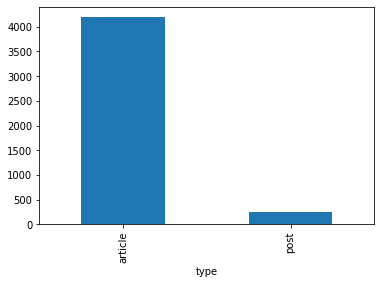

In [22]:
# How many articles per subject?
print(data.groupby(['type'])['content'].count())
data.groupby(['type'])['content'].count().plot(kind="bar")
plt.show()

label
fake     414
true    4021
Name: content, dtype: int64


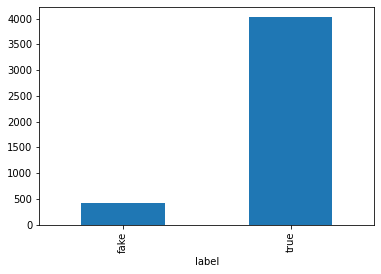

In [23]:
# How many fake and real articles?
print(data.groupby(['label'])['content'].count())
data.groupby(['label'])['content'].count().plot(kind="bar")
plt.show()

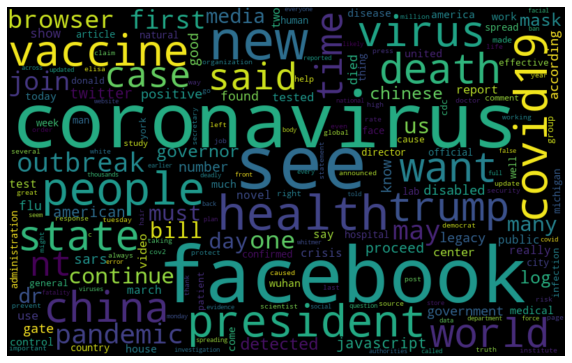

In [24]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["label"] == "fake"]
all_words = ' '.join([text for text in fake_data.content])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

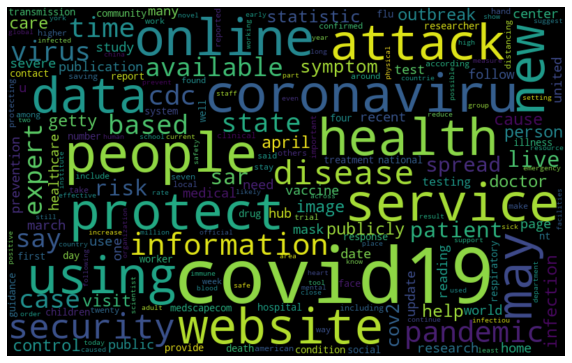

In [25]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["label"] == "true"]
all_words = ' '.join([text for text in real_data.content])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

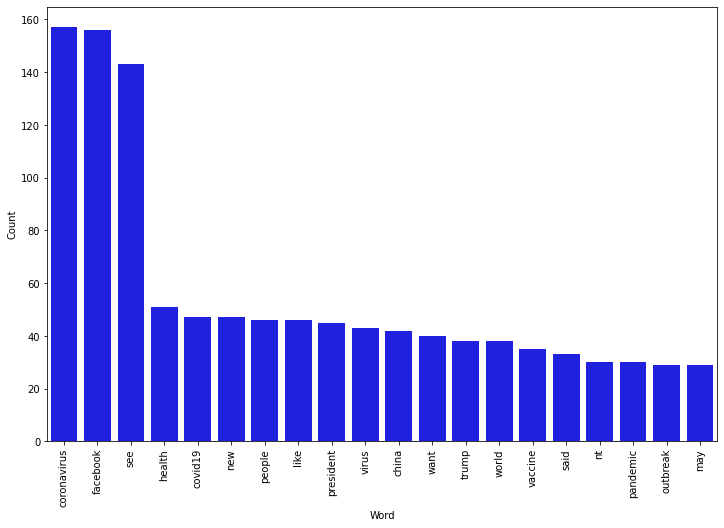

In [27]:
# Most frequent words in fake news
counter(data[data["label"] == "fake"], "content", 20)

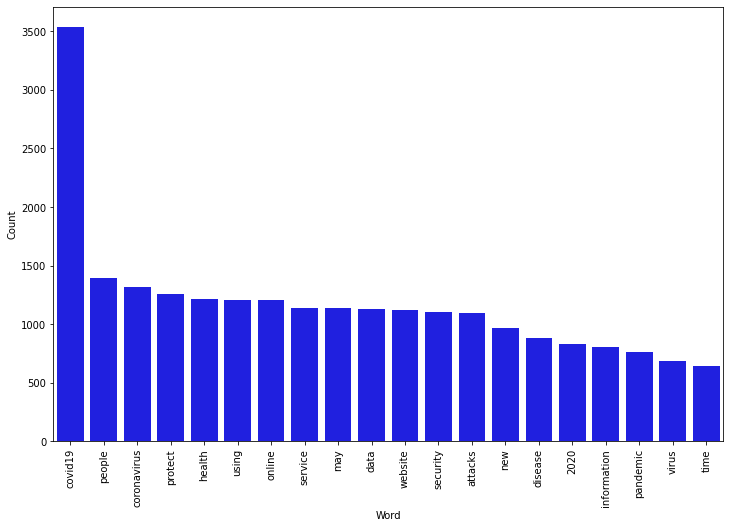

In [28]:
# Most frequent words in real news
counter(data[data["label"] == "true"], "content", 20)

## Modeling

In [29]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Peparing the data

In [30]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['content'], data.label, test_size=0.2, random_state=42)

# **Naive Bayes**




In [31]:
dct = dict()
dct_p = dict()
dct_r = dict()
dct_f1 = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("precission: {}%".format(round(precision_score(y_test, prediction, pos_label='true')*100,2)))
print("recall: {}%".format(round(recall_score(y_test, prediction, pos_label='true')*100,2)))
print("F1 score: {}%".format(round(f1_score(y_test, prediction, pos_label='true')*100,2)))
print(classification_report(y_test, prediction))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)
dct_p['Naive Bayes'] = round(precision_score(y_test, prediction, pos_label='true')*100,2)
dct_r['Naive Bayes'] = round(recall_score(y_test, prediction, pos_label='true')*100,2)
dct_f1['Naive Bayes'] = round(f1_score(y_test, prediction, pos_label='true')*100,2)

accuracy: 95.26%
precission: 95.16%
recall: 99.88%
F1 score: 97.46%
              precision    recall  f1-score   support

        fake       0.97      0.49      0.65        80
        true       0.95      1.00      0.97       807

    accuracy                           0.95       887
   macro avg       0.96      0.74      0.81       887
weighted avg       0.95      0.95      0.95       887



Confusion matrix, without normalization


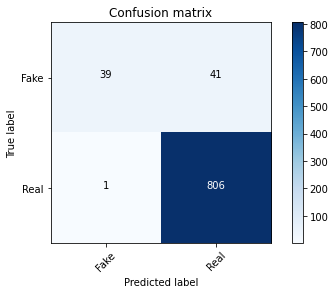

In [32]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Logistic regression**

In [33]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("precission: {}%".format(round(precision_score(y_test, prediction, pos_label='true')*100,2)))
print("recall: {}%".format(round(recall_score(y_test, prediction, pos_label='true')*100,2)))
print("F1 score: {}%".format(round(f1_score(y_test, prediction, pos_label='true')*100,2)))
print(classification_report(y_test, prediction))

dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)
dct_p['Logistic Regression'] = round(precision_score(y_test, prediction, pos_label='true')*100,2)
dct_r['Logistic Regression'] = round(recall_score(y_test, prediction, pos_label='true')*100,2)
dct_f1['Logistic Regression'] = round(f1_score(y_test, prediction, pos_label='true')*100,2)

accuracy: 95.49%
precission: 95.49%
recall: 99.75%
F1 score: 97.58%
              precision    recall  f1-score   support

        fake       0.95      0.53      0.68        80
        true       0.95      1.00      0.98       807

    accuracy                           0.95       887
   macro avg       0.95      0.76      0.83       887
weighted avg       0.95      0.95      0.95       887



Confusion matrix, without normalization


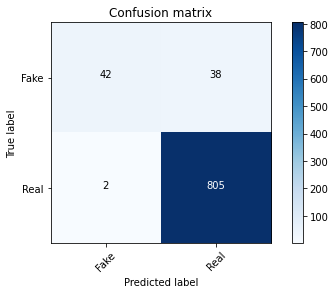

In [34]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Decision Tree**

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("precission: {}%".format(round(precision_score(y_test, prediction, pos_label='true')*100,2)))
print("recall: {}%".format(round(recall_score(y_test, prediction, pos_label='true')*100,2)))
print("F1 score: {}%".format(round(f1_score(y_test, prediction, pos_label='true')*100,2)))
print(classification_report(y_test, prediction))

dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)
dct_p['Decision Tree'] = round(precision_score(y_test, prediction, pos_label='true')*100,2)
dct_r['Decision Tree'] = round(recall_score(y_test, prediction, pos_label='true')*100,2)
dct_f1['Decision Tree'] = round(f1_score(y_test, prediction, pos_label='true')*100,2)

accuracy: 91.66%
precission: 95.98%
recall: 94.8%
F1 score: 95.39%
              precision    recall  f1-score   support

        fake       0.53      0.60      0.56        80
        true       0.96      0.95      0.95       807

    accuracy                           0.92       887
   macro avg       0.75      0.77      0.76       887
weighted avg       0.92      0.92      0.92       887



Confusion matrix, without normalization


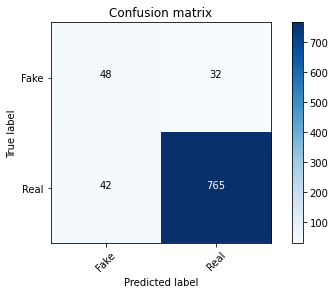

In [36]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Random Forest**

In [37]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("precission: {}%".format(round(precision_score(y_test, prediction, pos_label='true')*100,2)))
print("recall: {}%".format(round(recall_score(y_test, prediction, pos_label='true')*100,2)))
print("F1 score: {}%".format(round(f1_score(y_test, prediction, pos_label='true')*100,2)))
print(classification_report(y_test, prediction))

dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)
dct_p['Random Forest'] = round(precision_score(y_test, prediction, pos_label='true')*100,2)
dct_r['Random Forest'] = round(recall_score(y_test, prediction, pos_label='true')*100,2)
dct_f1['Random Forest'] = round(f1_score(y_test, prediction, pos_label='true')*100,2)

accuracy: 96.62%
precission: 96.98%
recall: 99.38%
F1 score: 98.16%
              precision    recall  f1-score   support

        fake       0.92      0.69      0.79        80
        true       0.97      0.99      0.98       807

    accuracy                           0.97       887
   macro avg       0.94      0.84      0.88       887
weighted avg       0.96      0.97      0.96       887



Confusion matrix, without normalization


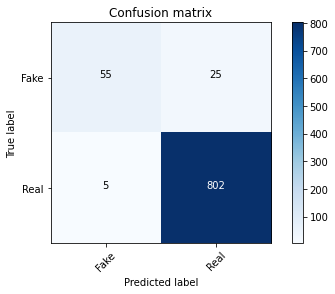

In [38]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## **SVM**

In [39]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("precission: {}%".format(round(precision_score(y_test, prediction, pos_label='true')*100,2)))
print("recall: {}%".format(round(recall_score(y_test, prediction, pos_label='true')*100,2)))
print("F1 score: {}%".format(round(f1_score(y_test, prediction, pos_label='true')*100,2)))
print(classification_report(y_test, prediction))

dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)
dct_p['SVM'] = round(precision_score(y_test, prediction, pos_label='true')*100,2)
dct_r['SVM'] = round(recall_score(y_test, prediction, pos_label='true')*100,2)
dct_f1['SVM'] = round(f1_score(y_test, prediction, pos_label='true')*100,2)

accuracy: 96.73%
precission: 97.21%
recall: 99.26%
F1 score: 98.22%
              precision    recall  f1-score   support

        fake       0.90      0.71      0.80        80
        true       0.97      0.99      0.98       807

    accuracy                           0.97       887
   macro avg       0.94      0.85      0.89       887
weighted avg       0.97      0.97      0.97       887



Confusion matrix, without normalization


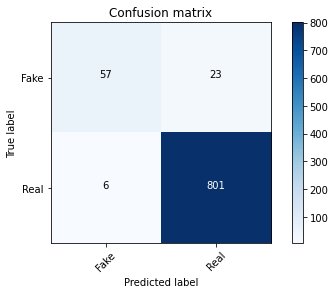

In [40]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## **KNN**

In [41]:
from sklearn.neighbors import KNeighborsClassifier

#Create a svm Classifier
knn = KNeighborsClassifier(n_neighbors = 3)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', knn)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("precission: {}%".format(round(precision_score(y_test, prediction, pos_label='true')*100,2)))
print("recall: {}%".format(round(recall_score(y_test, prediction, pos_label='true')*100,2)))
print("F1 score: {}%".format(round(f1_score(y_test, prediction, pos_label='true')*100,2)))
print(classification_report(y_test, prediction))

dct['KNN'] = round(accuracy_score(y_test, prediction)*100,2)
dct_p['KNN'] = round(precision_score(y_test, prediction, pos_label='true')*100,2)
dct_r['KNN'] = round(recall_score(y_test, prediction, pos_label='true')*100,2)
dct_f1['KNN'] = round(f1_score(y_test, prediction, pos_label='true')*100,2)

accuracy: 95.83%
precission: 96.61%
recall: 98.88%
F1 score: 97.73%
              precision    recall  f1-score   support

        fake       0.85      0.65      0.74        80
        true       0.97      0.99      0.98       807

    accuracy                           0.96       887
   macro avg       0.91      0.82      0.86       887
weighted avg       0.96      0.96      0.96       887



Confusion matrix, without normalization


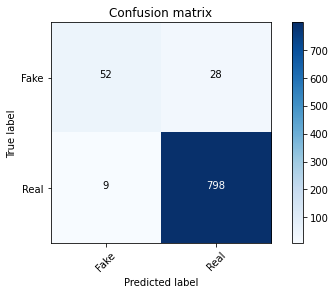

In [42]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Comparing** **Different Models**

([<matplotlib.axis.YTick at 0x1ddb45c5340>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

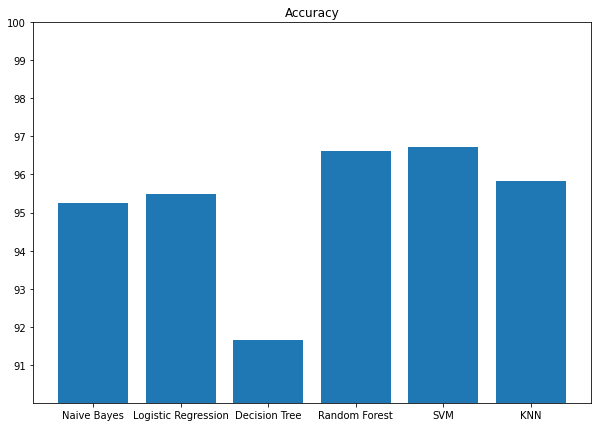

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.title('Accuracy')
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

([<matplotlib.axis.YTick at 0x1ddb459c3d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

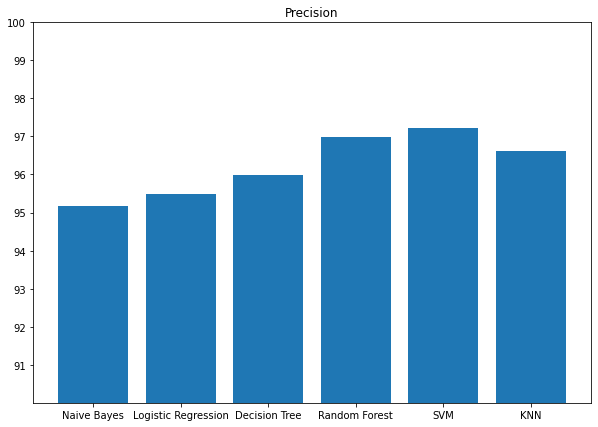

In [44]:
plt.figure(figsize=(10,7))
plt.bar(list(dct_p.keys()),list(dct_p.values()))
plt.title('Precision')
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

([<matplotlib.axis.YTick at 0x1ddb46fe550>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

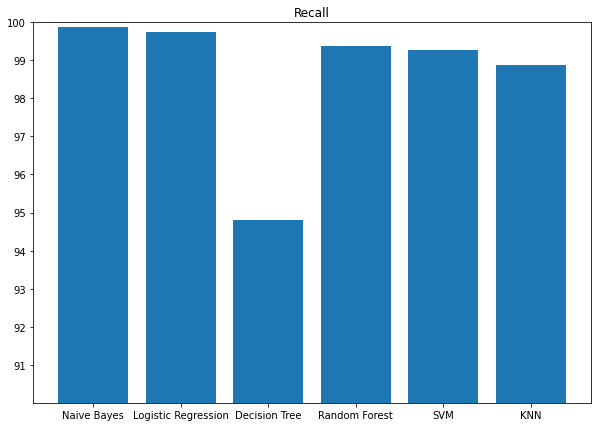

In [45]:
plt.figure(figsize=(10,7))
plt.bar(list(dct_r.keys()),list(dct_r.values()))
plt.title('Recall')
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

([<matplotlib.axis.YTick at 0x1ddb411b6d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

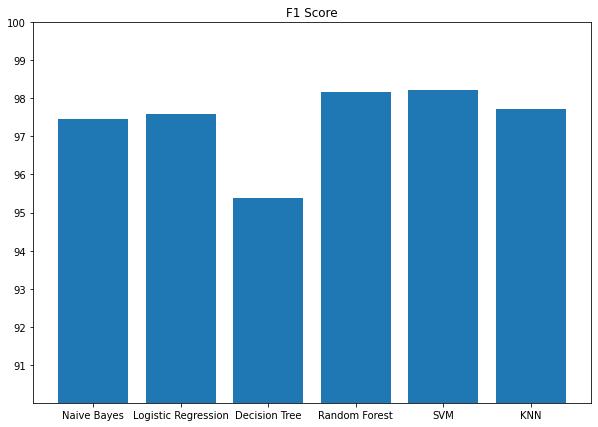

In [46]:
plt.figure(figsize=(10,7))
plt.bar(list(dct_f1.keys()),list(dct_f1.values()))
plt.title('F1 Score')
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))